<a href="https://colab.research.google.com/github/theneuron19/Mask_RCNN/blob/master/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.image as mp
import matplotlib.pyplot as plt

In [0]:
filename = '94965.png'
image = mp.imread(filename,0)
height, width = image.shape[:2]

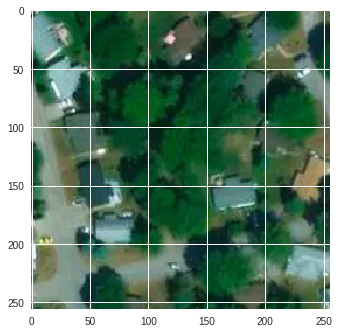

In [32]:
imgplot = plt.imshow(image)

In [0]:
height, width = image.shape[:2]

In [0]:
import os
image_id = os.path.splitext(filename)[0]

In [38]:
image

array([[[146, 173, 158],
        [113, 140, 125],
        [ 91, 122, 106],
        ...,
        [ 86, 106,  71],
        [114, 134,  99],
        [141, 163, 127]],

       [[156, 182, 169],
        [ 93, 121, 107],
        [ 65,  96,  81],
        ...,
        [ 85, 105,  70],
        [ 98, 120,  84],
        [114, 136, 100]],

       [[122, 149, 140],
        [ 66,  93,  84],
        [ 49,  81,  70],
        ...,
        [ 87, 109,  71],
        [ 86, 108,  70],
        [ 87, 109,  71]],

       ...,

       [[ 89, 119,  91],
        [ 86, 116,  88],
        [ 79, 112,  85],
        ...,
        [153, 185, 172],
        [173, 206, 195],
        [150, 183, 174]],

       [[ 71, 104,  75],
        [ 69, 102,  73],
        [ 63,  97,  70],
        ...,
        [128, 159, 143],
        [167, 197, 185],
        [174, 204, 192]],

       [[ 55,  88,  57],
        [ 51,  86,  56],
        [ 44,  80,  52],
        ...,
        [121, 149, 134],
        [155, 183, 169],
        [168, 198, 186]]

In [45]:
import json

with open('94965.json') as json_data:
    d = json.load(json_data)
    print(d)

{'flags': {}, 'shapes': [{'label': 'building 1', 'line_color': None, 'fill_color': None, 'points': [[135, 7], [109, 31], [125, 47], [152, 20]]}, {'label': 'building 2', 'line_color': None, 'fill_color': None, 'points': [[29, 93], [38, 123], [65, 118], [58, 86]]}, {'label': 'building 3', 'line_color': None, 'fill_color': None, 'points': [[38, 134], [49, 171], [68, 165], [58, 128]]}, {'label': 'building 4', 'line_color': None, 'fill_color': None, 'points': [[155, 150], [157, 172], [195, 166], [191, 143]]}, {'label': 'building 5', 'line_color': None, 'fill_color': None, 'points': [[55, 178], [55, 201], [88, 199], [88, 178]]}, {'label': 'building 6', 'line_color': None, 'fill_color': None, 'points': [[224, 201], [217, 228], [253, 235], [256, 210]]}, {'label': 'building 7', 'line_color': None, 'fill_color': None, 'points': [[11, 52], [26, 79], [55, 58], [31, 40]]}], 'lineColor': [0, 255, 0, 128], 'fillColor': [255, 0, 0, 128], 'imagePath': 'new_training\\94965.png', 'imageData': '/9j/4AAQSk

In [54]:
!pip install tablib
!pip install coco

    100% |████████████████████████████████| 71kB 3.8MB/s 
    100% |████████████████████████████████| 696kB 8.8MB/s 
    100% |████████████████████████████████| 1.9MB 10.8MB/s 
    100% |████████████████████████████████| 112kB 16.4MB/s 
    100% |████████████████████████████████| 102kB 20.5MB/s 
  Running setup.py bdist_wheel for tablib ... - \ done
  Stored in directory: /root/.cache/pip/wheels/ea/e4/b9/9eb46eaf91476d5dd88a5cf6f76f0884114eafe0b2ef24e2df
  Running setup.py bdist_wheel for odfpy ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/da/af/f6/a0b436814a73a88125b8fa82acc73ae96de511bc1faa62b7cc
  Running setup.py bdist_wheel for openpyxl ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/57/41/b9/3765af8bda4a8d4b6aaf4957d7214984c3332348713e85cf36
  Running setup.py bdist_wheel for unicodecsv ... - done
  Stored in directory: /root/.cache/pip/wheels/a6/09/e9/e800279c98a0a8c94543f3de6c8a562f60e51363ed26e71283
  Running setup.py bdist_wheel

In [62]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "sample_data/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

... done downloading pretrained model!


In [63]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

In [65]:
!pip install keras

In [64]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


ImportError: ignored

In [0]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [75]:
# Load a random image from the images folder

#IMAGE_DIR = os.path.join(ROOT_DIR,"")
#file_names = next(os.walk(IMAGE_DIR))[1]
image = skimage.io.imread(os.path.join("94965.png"))

print(image)

[[[146 173 158]
  [113 140 125]
  [ 91 122 106]
  ...
  [ 86 106  71]
  [114 134  99]
  [141 163 127]]

 [[156 182 169]
  [ 93 121 107]
  [ 65  96  81]
  ...
  [ 85 105  70]
  [ 98 120  84]
  [114 136 100]]

 [[122 149 140]
  [ 66  93  84]
  [ 49  81  70]
  ...
  [ 87 109  71]
  [ 86 108  70]
  [ 87 109  71]]

 ...

 [[ 89 119  91]
  [ 86 116  88]
  [ 79 112  85]
  ...
  [153 185 172]
  [173 206 195]
  [150 183 174]]

 [[ 71 104  75]
  [ 69 102  73]
  [ 63  97  70]
  ...
  [128 159 143]
  [167 197 185]
  [174 204 192]]

 [[ 55  88  57]
  [ 51  86  56]
  [ 44  80  52]
  ...
  [121 149 134]
  [155 183 169]
  [168 198 186]]]


Processing 1 images
image                    shape: (256, 256, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


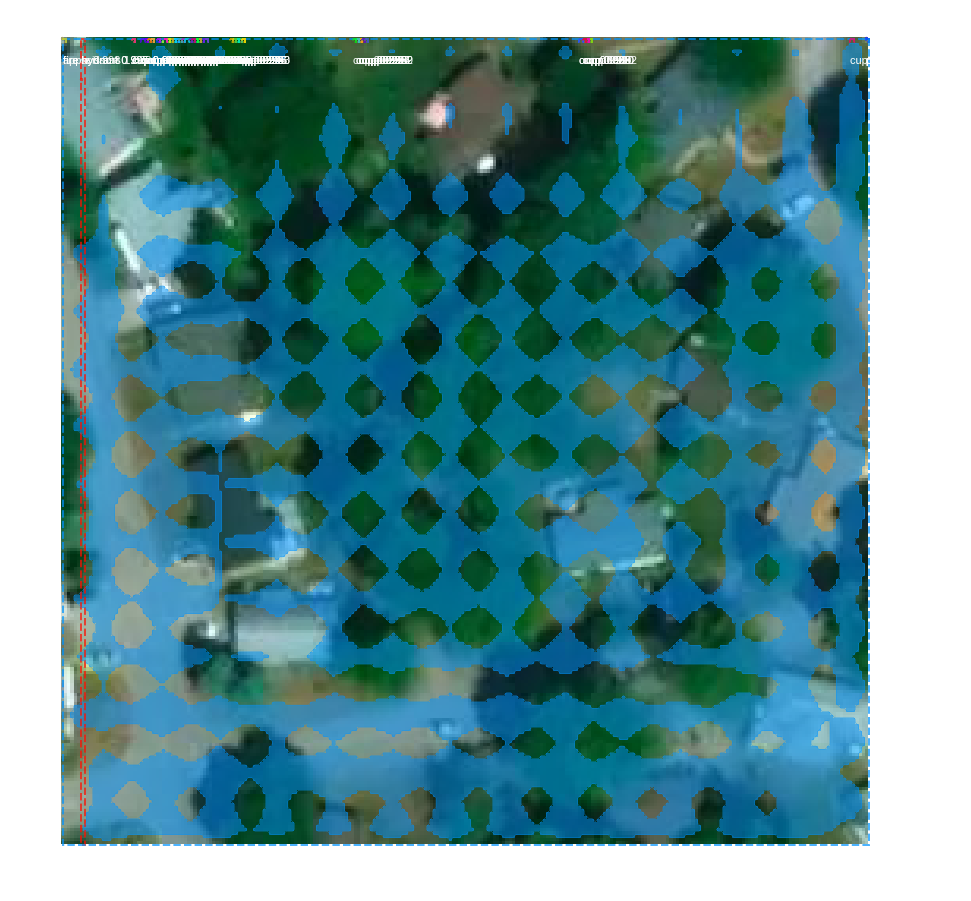

In [76]:
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])